In [1]:
import math,numpy,scipy.linalg
import matplotlib.pyplot as plt

In [2]:
A0=1e-4
def A_evenly(x):
    return A0

k_linear=0.9
def A_linear(x):
    return A0*(1-k_linear*x)

In [3]:
from scipy.integrate import quad as scint
def integrate_A(fun_A,nodes):
    """
        nodes should include the start and end point
        so if there are N segments, len(nodes) should be N+1
        ans the length of return list is N
    """
    N=len(nodes)-1
    return [scint(fun_A,nodes[i],nodes[i+1])[0]/(nodes[i+1]-nodes[i])**2 for i in range(N)]

In [4]:
def gen_K(fun_A,nodes):
    N=len(nodes)-1
    J=integrate_A(fun_A,nodes)
    K=numpy.zeros((3,N))
    for i in range(N-1):
        K[0,i+1]=-J[i+1]
        K[2,i]=-J[i+1]
    for i in range(N-1):
        K[1,i]=J[i]+J[i+1]
    K[1,N-1]=J[N-1]
    return K

In [5]:
nodes=numpy.linspace(0,1,11)
print("len nodes:",len(nodes))
print(nodes)
J=integrate_A(A_evenly,nodes)
print("len J:",len(J))
print(J)

len nodes: 11
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
len J: 10
[0.0009999999999999998, 0.0009999999999999998, 0.0009999999999999998, 0.0010000000000000002, 0.0010000000000000002, 0.0009999999999999992, 0.0010000000000000002, 0.0010000000000000002, 0.0010000000000000002, 0.0010000000000000002]


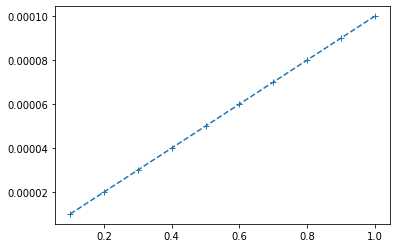

In [6]:
F=1e-8
N=10
nodes=numpy.linspace(0,1,N+1)
K=gen_K(A_evenly,nodes)
b=numpy.zeros(N);b[-1]=F
u=scipy.linalg.solve_banded((1,1),K,b)
plt.plot(nodes[1:],u,'--+')
plt.show()

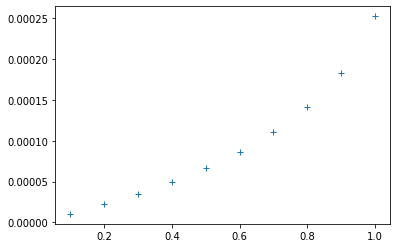

In [7]:
F=1e-8
N=10
nodes=numpy.linspace(0,1,N+1)
K=gen_K(A_linear,nodes)
b=numpy.zeros(N);b[-1]=F
u=scipy.linalg.solve_banded((1,1),K,b)
plt.plot(nodes[1:],u,'+',label="FEM")
plt.show()

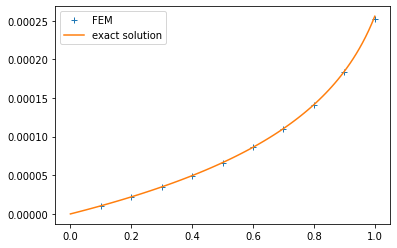

In [8]:
plt.plot(nodes[1:],u,'+',label="FEM")
n2=numpy.linspace(0,1,100)
ext_sol=-(F/(A0*k_linear))*numpy.log(1-k_linear*n2)
plt.plot(n2,ext_sol,label="exact solution")
plt.legend()
plt.show()